In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
train=pd.read_csv("C:\\Users\\Gunja\\Desktop\\hckerth_amazon\\train.csv")
test=pd.read_csv('C:\\Users\\Gunja\\Desktop\\hckerth_amazon\\test.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  float64
 3   Delivery_person_Ratings      43685 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weather_conditions           44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [41]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,43739.0,29.567137,5.815155,15.000000,25.000000,30.000000,35.000000,50.000000
Delivery_person_Ratings,43685.0,4.633780,0.334716,1.000000,4.500000,4.700000,4.900000,6.000000
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44600.0,0.744664,0.572473,0.000000,0.000000,1.000000,1.000000,3.000000
Time_taken,45593.0,26.294607,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000


In [42]:
train.describe(include='O').T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,43862,176,21:55,461
Time_Order_picked,45593,193,21:30,496
Weather_conditions,44977,6,Fog,7654
Road_traffic_density,44992,4,Low,15477
Type_of_order,45593,4,Snack,11533
Type_of_vehicle,45593,4,motorcycle,26435
Festival,45365,2,No,44469


In [43]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0


In [44]:
train.City.unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', nan], dtype=object)

In [8]:
cat_col=['Weather_conditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City']
train['Weather_conditions']=train['Weather_conditions'].map({'Sunny':0, 'Stormy':1, 'Sandstorms':2, 'Cloudy':3, 'Fog':4, 
                                                            'Windy':5})
train['Road_traffic_density']=train['Road_traffic_density'].map({'High':2, 'Jam':3, 'Low':0, 'Medium':1})
train['Type_of_order']=train['Type_of_order'].map({'Snack':0, 'Drinks':1, 'Buffet':2, 'Meal':3})
train['Type_of_vehicle']=train['Type_of_vehicle'].map({'motorcycle':3, 'scooter':2, 'electric_scooter':1, 'bicycle':0})
train['Festival']=train['Festival'].map({"No":0,'Yes':1})
train['City']=train["City"].map({'Urban':1, 'Metropolitian':0, 'Semi-Urban':2})
                                                      
num_col=['Delivery_person_Age','Delivery_person_Ratings','Restaurant_longitude','Restaurant_latitude',
         'Delivery_location_latitude','Delivery_location_longitude','Time_taken']

In [9]:
train

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,0.0,2.0,2,0,3,0.0,0.0,1.0,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,1.0,3.0,2,0,2,1.0,0.0,0.0,33.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,2.0,0.0,0,1,3,1.0,0.0,1.0,26.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,0.0,1.0,0,2,3,1.0,0.0,0.0,21.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,3.0,2.0,1,0,2,1.0,0.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,5.0,2.0,1,3,3,0.0,0.0,0.0,32.0
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,5.0,3.0,0,2,3,1.0,0.0,0.0,36.0
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05,3.0,0.0,1,1,2,0.0,0.0,0.0,16.0
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,3.0,2.0,0,0,3,1.0,0.0,0.0,26.0


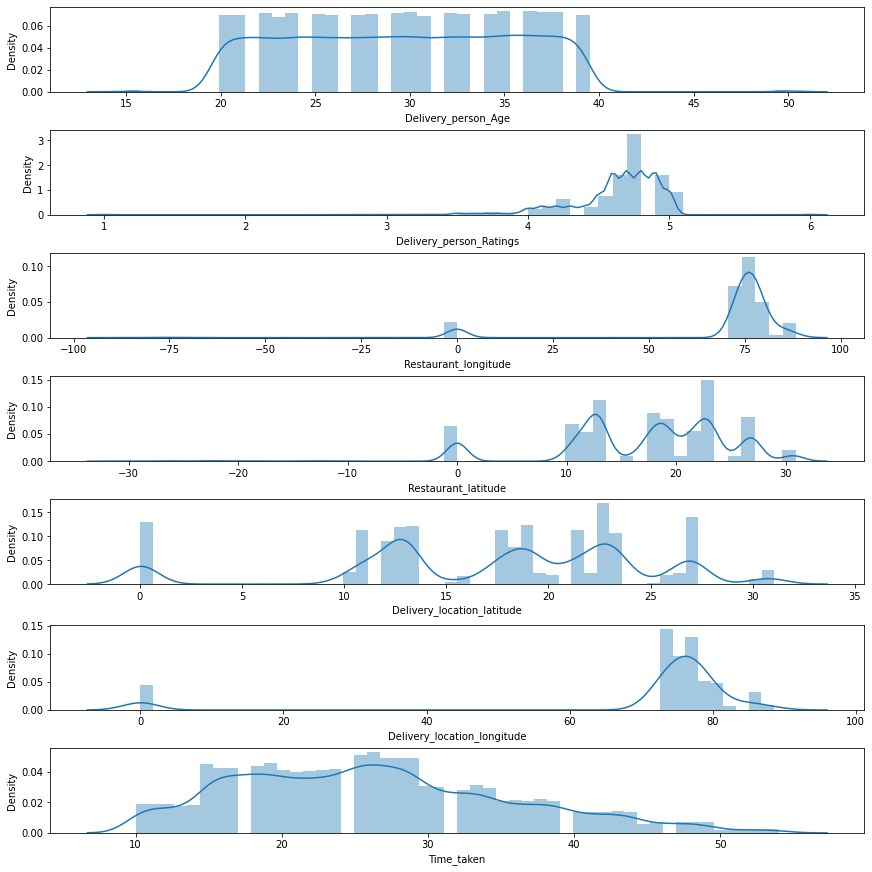

In [47]:
count=0
fig,ax=plt.subplots(7,constrained_layout=True,figsize=(12,12))
for i in num_col:
    sns.distplot(train[i],ax=ax[count])
    count+=1

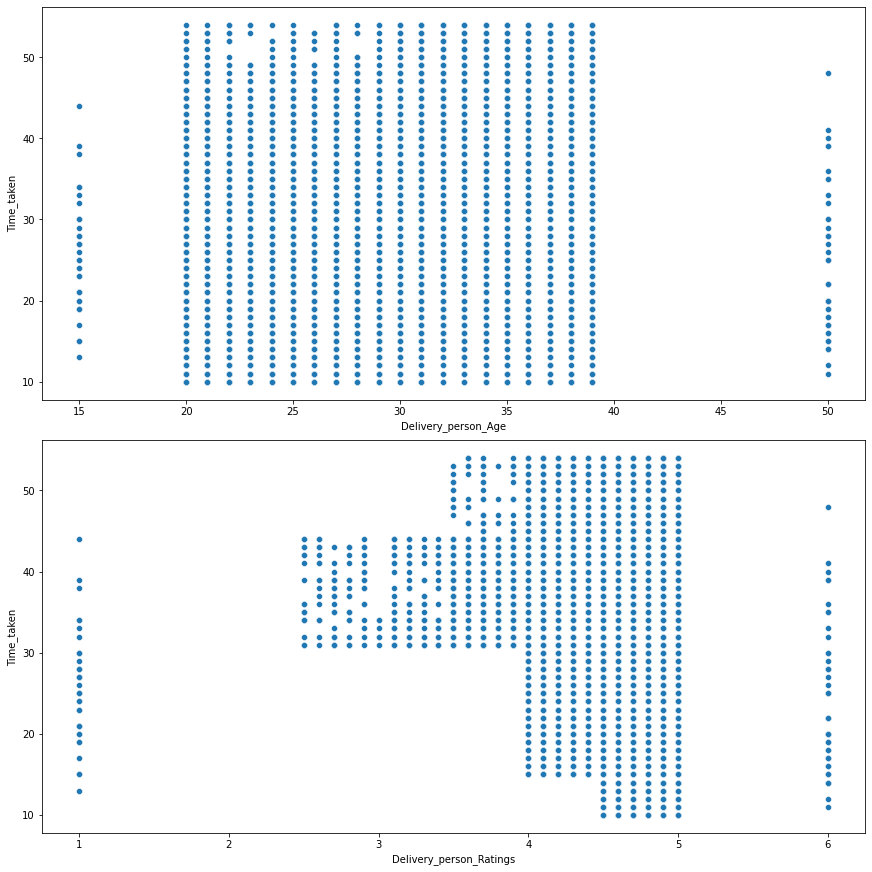

In [48]:
count=0
fig,ax=plt.subplots(2,constrained_layout=True,figsize=(12,12))
for i in ['Delivery_person_Age','Delivery_person_Ratings']:
    sns.scatterplot(x=i,y='Time_taken',data=train,ax=ax[count])
    count+=1

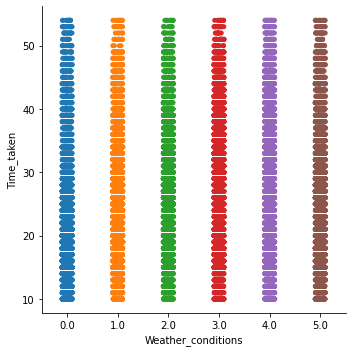

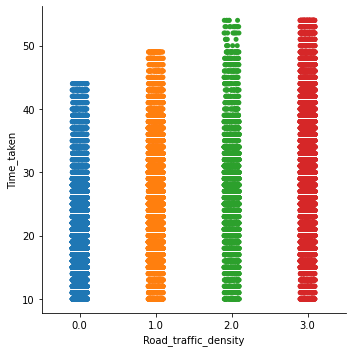

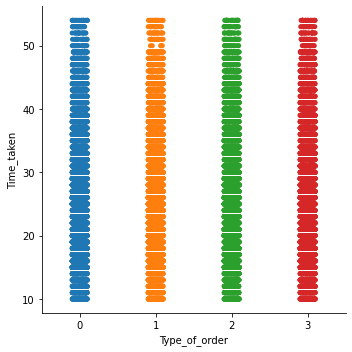

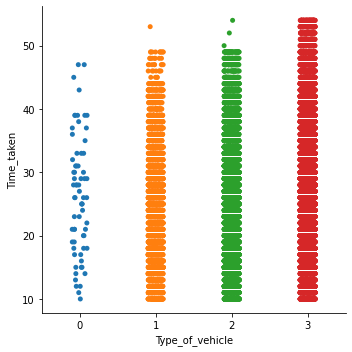

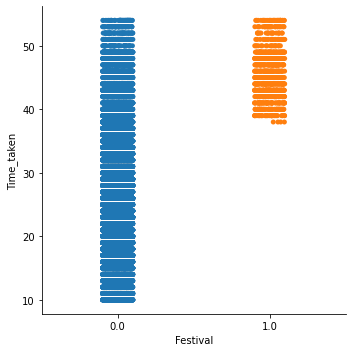

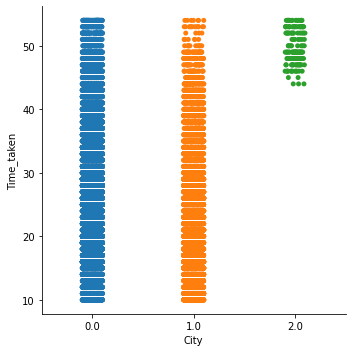

In [49]:
c=0
for i in cat_col:
    sns.catplot(x=i,y='Time_taken',data=train,ax=ax[c])
    count+=1

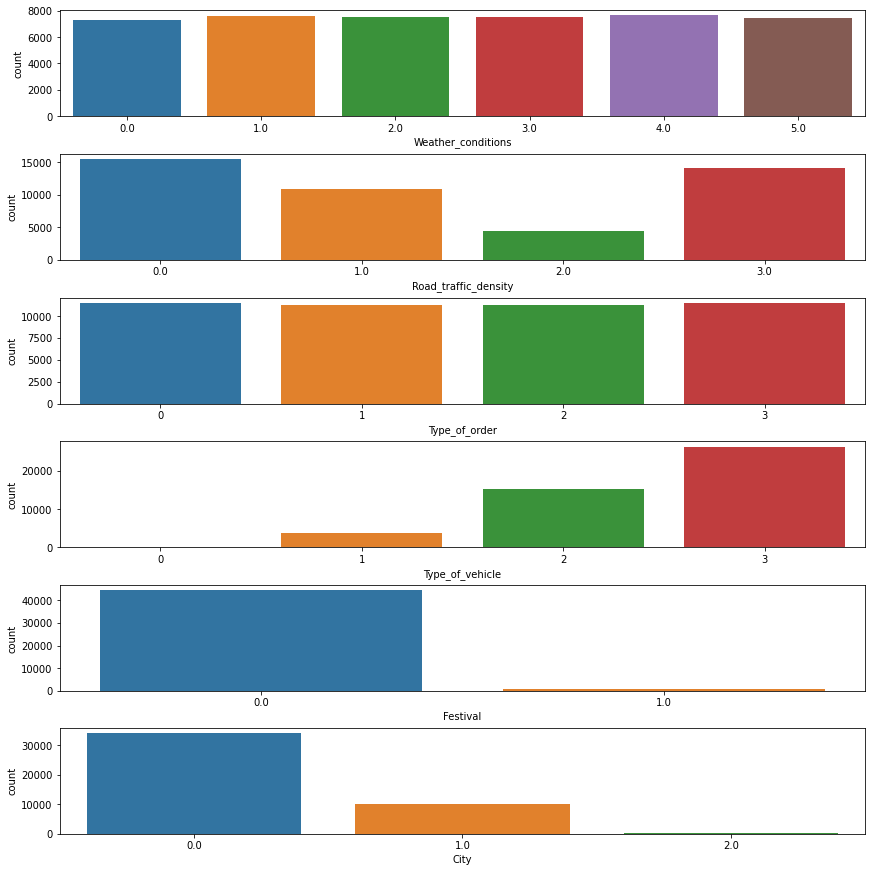

In [50]:
count=0
fig,ax=plt.subplots(6,constrained_layout=True,figsize=(12,12))
for i in cat_col:
    sns.countplot(train[i],ax=ax[count])
    count+=1

In [51]:
train.isnull().sum()/train.shape[0]*100

ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            4.066414
Delivery_person_Ratings        4.184853
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    3.796635
Time_Order_picked              0.000000
Weather_conditions             1.351085
Road_traffic_density           1.318185
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            2.177966
Festival                       0.500077
City                           2.631983
Time_taken                     0.000000
dtype: float64

In [52]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,0.0,2.0,2,0,3,0.0,0.0,1.0,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,1.0,3.0,2,0,2,1.0,0.0,0.0,33.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,2.0,0.0,0,1,3,1.0,0.0,1.0,26.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,0.0,1.0,0,2,3,1.0,0.0,0.0,21.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,3.0,2.0,1,0,2,1.0,0.0,0.0,30.0


In [53]:
train.nunique()

ID                             45593
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weather_conditions                 6
Road_traffic_density               4
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                4
Festival                           2
City                               3
Time_taken                        45
dtype: int64

In [10]:
train['Order_Date']=pd.to_datetime(train.Order_Date)
train['weekday']=train['Order_Date'].dt.weekday

In [11]:
train['Restaurant_latitude']=train['Restaurant_latitude'].abs()
train['Restaurant_longitude']=train['Restaurant_longitude'].abs()

In [12]:
train['Restaurant_latitude']=train['Restaurant_latitude'].mask(train['Restaurant_latitude']<1)
train['Restaurant_longitude']=train['Restaurant_longitude'].mask(train['Restaurant_longitude']<1)
train['Delivery_location_latitude']=train['Delivery_location_latitude'].mask(train['Delivery_location_latitude']<1)
train['Delivery_location_longitude']=train['Delivery_location_longitude'].mask(train['Delivery_location_longitude']<1)

In [13]:
na_data=train[train.isna().any(axis=1)]

In [14]:
train.dropna(inplace=True)

In [59]:
train['Delivery_person_city']=train['Delivery_person_ID'].str.extract('([A-Z]+)')

In [60]:
train['Delivery_person_city'].unique()

array(['INDORES', 'BANGRES', 'COIMBRES', 'CHENRES', 'HYDRES', 'RANCHIRES',
       'MYSRES', 'DEHRES', 'KOCRES', 'PUNERES', 'LUDHRES', 'KNPRES',
       'MUMRES', 'KOLRES', 'JAPRES', 'SURRES', 'GOARES', 'AGRRES',
       'ALHRES', 'VADRES', 'AURGRES', 'BHPRES'], dtype=object)

In [61]:
city={'INDORES':'Indore','BANGRES':'Banglore','COIMBRES':'Coimbatore','CHENRES':'Chennai','HYDRES':'Hyderabad','RANCHIRES':'Ranchi',
'MYSRES':'Mysore','DEHRES':'Dehradun','KOCRES':'Kochi','PUNERES':'Pune','LUDHRES':'Ludhiyana','KNPRES':'Kanpur','MUMRES':"Mumbai",
'KOLRES':'Kolkata','JAPRES':'Jaipur','SURRES':'Surat','GOARES':'Goa','AURGRES':'Aurangabad','AGRRES':'Agra','VADRES':"Vadodra",
'ALHRES':"Allahabad",'BHPRES':"Bhopal"}

In [62]:
train['Res_city']=train['Delivery_person_city'].map(city)

In [15]:
def for_pick_dur(train):
    train['order_hour']=train['Time_Orderd'].str.split(':').str[0]
    train['order_min']=train['Time_Orderd'].str.split(':').str[1]
    train['order_picked_hour']=train['Time_Order_picked'].str.split(':').str[0]
    train['order_picked_min']=train['Time_Order_picked'].str.split(':').str[1]
    train['order_hour']=train['order_hour'].astype(int)
    train['order_min']=train['order_min'].astype(int)
    train['order_picked_hour']=train['order_picked_hour'].astype(int)
    train['order_picked_min']=train['order_picked_min'].astype(int)
    train['increm_order_hour']=np.where(train['order_min']!=60,0,1)
    train['increm_order_picked_hour']=np.where(train['order_picked_min']!=60,0,1)
    train['order_min']=np.where(train['order_min']==60,0,train['order_min'])
    train['order_picked_min']=np.where(train['order_picked_min']==60,0,train['order_picked_min'])
    train['order_hour']=train['increm_order_hour']+train['order_hour']
    train['order_picked_hour']=train['increm_order_picked_hour']+train['order_picked_hour']
    train['order_hour']=np.where(train['order_hour']==24,0,train['order_hour'])
    train['order_picked_hour']=np.where(train['order_picked_hour']==24,0,train['order_picked_hour'])
    train['list_of_order_&_picked']=list(zip(train['order_hour'],train['order_min'],train['order_picked_hour'],
                                             train['order_picked_min']))
    train.drop(columns=['order_min','order_picked_hour','order_picked_min','increm_order_hour',
                       'increm_order_picked_hour'],inplace=True)

In [16]:
for_pick_dur(train)

<AxesSubplot:xlabel='order_hour', ylabel='count'>

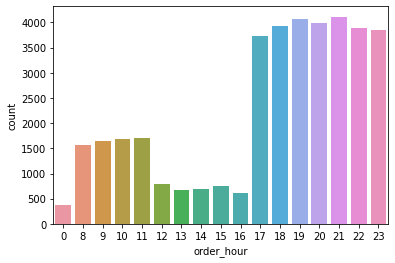

In [17]:
sns.countplot(train['order_hour'])

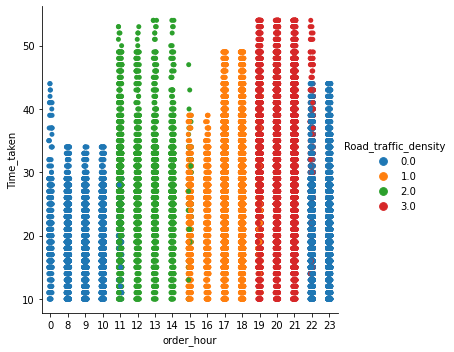

In [18]:
sns.catplot(x='order_hour',y='Time_taken',data=train,hue='Road_traffic_density')

In [65]:
def dur_btw_order_and_pick(x):
    order_hour=int(x[0])
    order_min=int(x[1])
    picked_hour=int(x[2])
    picked_min=int(x[3])
    if order_hour==picked_hour:
        return picked_min-order_min
    else:
        return 60-order_min+picked_min

In [66]:
train['dur_btw_order_and_pick']=train['list_of_order_&_picked'].apply(dur_btw_order_and_pick)

In [67]:
train['Res_ID']=train['Delivery_person_ID'].str.extract('([A-z]+[0-9]+)')

In [68]:
import haversine as hs
train['res_loc']=list(zip(list(zip(train['Restaurant_latitude'],train['Restaurant_longitude'])),list(zip(train[
    'Delivery_location_latitude'],train['Delivery_location_longitude']))))



In [69]:
train['dis_btw_rest_deliv_place']=train['res_loc'].apply(lambda x :hs.haversine(x[0],x[1]))

In [70]:
train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken', 'weekday',
       'Delivery_person_city', 'Res_city', 'list_of_order_&_picked',
       'dur_btw_order_and_pick', 'Res_ID', 'res_loc',
       'dis_btw_rest_deliv_place'],
      dtype='object')

In [71]:
new_cat=['Res_city','weekday','dur_btw_order_and_pick']
new_num=['dis_btw_rest_deliv_place']

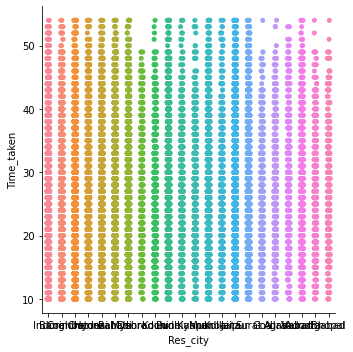

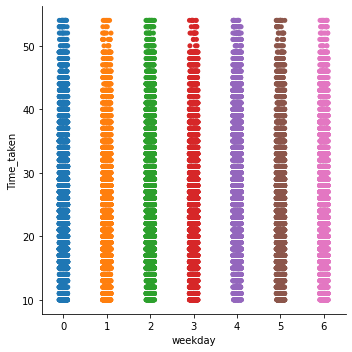

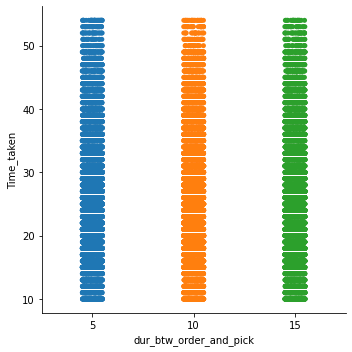

In [72]:
count=0
for i in new_cat:
    sns.catplot(x=i,y='Time_taken',data=train,ax=ax[count])
    count+=1

In [73]:
train.dtypes

ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                   float64
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                     datetime64[ns]
Time_Orderd                            object
Time_Order_picked                      object
Weather_conditions                    float64
Road_traffic_density                  float64
Vehicle_condition                       int64
Type_of_order                           int64
Type_of_vehicle                         int64
multiple_deliveries                   float64
Festival                              float64
City                                  float64
Time_taken                            float64
weekday                                 int64
Delivery_person_city              

In [74]:
train

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,City,Time_taken,weekday,Delivery_person_city,Res_city,list_of_order_&_picked,dur_btw_order_and_pick,Res_ID,res_loc,dis_btw_rest_deliv_place
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30,...,1.0,24.0,5,INDORES,Indore,"(11, 30, 11, 45)",15,INDORES13,"((22.745049, 75.892471), (22.765049, 75.912471))",3.025153
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45,...,0.0,33.0,4,BANGRES,Banglore,"(19, 45, 19, 50)",5,BANGRES18,"((12.913041, 77.683237), (13.043041, 77.813237))",20.183558
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30,...,1.0,26.0,5,BANGRES,Banglore,"(8, 30, 8, 45)",15,BANGRES19,"((12.914264, 77.6784), (12.924264, 77.6884))",1.552760
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,17:60,...,0.0,21.0,2,COIMBRES,Coimbatore,"(18, 0, 18, 10)",10,COIMBRES13,"((11.003669, 76.976494), (11.053669, 77.026494))",7.790412
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30,...,0.0,30.0,5,CHENRES,Chennai,"(13, 30, 13, 45)",15,CHENRES12,"((12.972793, 80.249982), (13.012793, 80.289982))",6.210147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45587,0x1178,RANCHIRES16DEL01,35.0,4.2,23.371292,85.327872,23.481292,85.437872,2022-08-03,21:45,...,0.0,33.0,2,RANCHIRES,Ranchi,"(21, 45, 21, 55)",10,RANCHIRES16,"((23.371292, 85.327872), (23.481292, 85.437872))",16.600295
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35,...,0.0,32.0,3,JAPRES,Jaipur,"(11, 35, 11, 45)",10,JAPRES04,"((26.902328, 75.794257), (26.912328, 75.804257))",1.489848
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,23:50,...,0.0,16.0,3,CHENRES,Chennai,"(23, 50, 0, 5)",15,CHENRES08,"((13.022394, 80.242439), (13.052394, 80.272439))",4.657202
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,13:35,...,0.0,26.0,6,COIMBRES,Coimbatore,"(13, 35, 13, 40)",5,COIMBRES11,"((11.001753, 76.986241), (11.041753, 77.026241))",6.232402


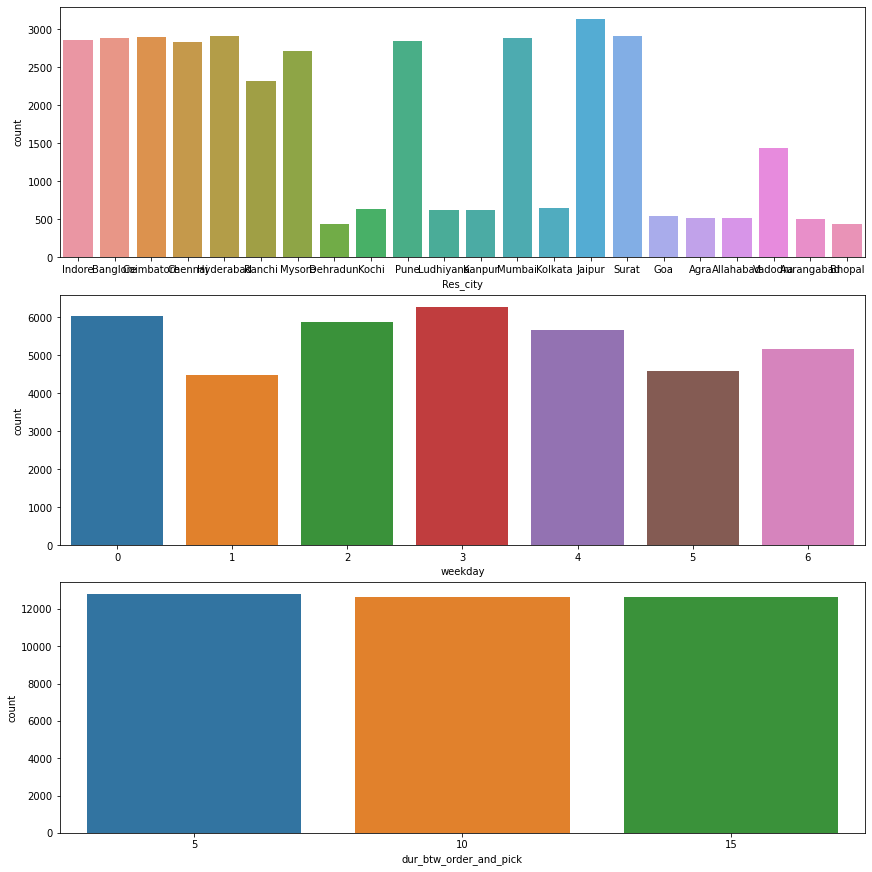

In [75]:
count=0
fig,ax=plt.subplots(3,constrained_layout=True,figsize=(12,12))
for i in new_cat:
    sns.countplot(train[i],ax=ax[count])
    count+=1

<AxesSubplot:>

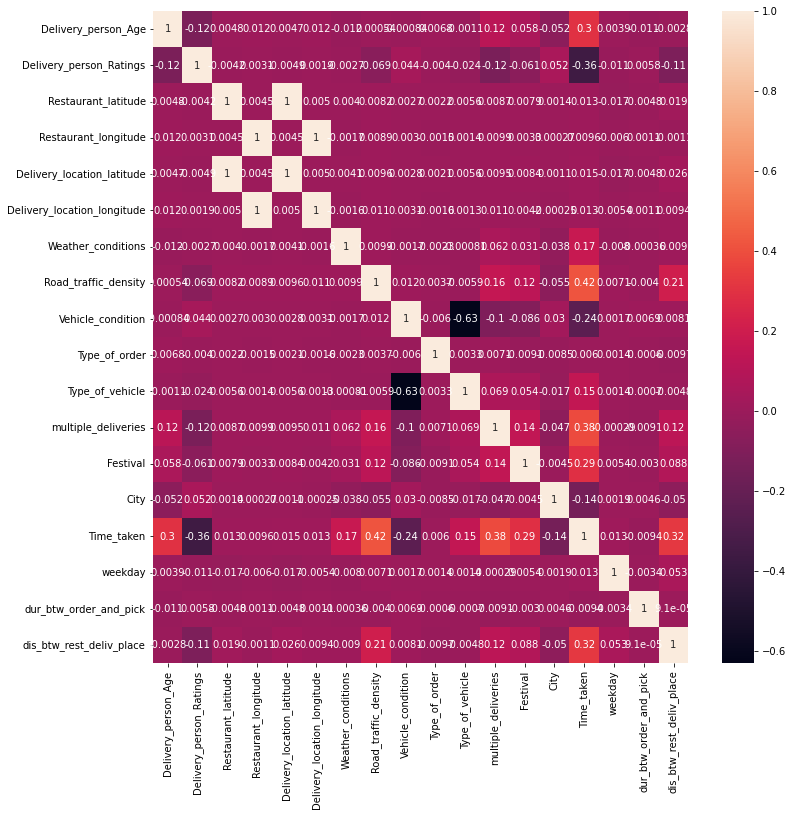

In [77]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True)

In [78]:
na_data['Delivery_person_city']=na_data['Delivery_person_ID'].str.extract('([A-Z]+)')
na_data['Res_city']=na_data['Delivery_person_city'].map(city)
na_data['Res_ID']=na_data['Delivery_person_ID'].str.extract('([A-z]+[0-9]+)')

In [79]:
res=na_data[na_data['Restaurant_latitude'].notna()]

In [80]:
res['res_loc']=list(zip(list(zip(res['Restaurant_latitude'],res['Restaurant_longitude'])),list(zip(res[
    'Delivery_location_latitude'],res['Delivery_location_longitude']))))

In [81]:
res['dis_btw_rest_deliv_place']=res['res_loc'].apply(lambda x :hs.haversine(x[0],x[1]))

In [82]:
resid=na_data[na_data['Restaurant_latitude'].isna()]

In [83]:
new=pd.concat([res,resid])

In [84]:
ordrna=new[new.Time_Orderd.isna()]

In [85]:
ordr=new[new.Time_Orderd.notna()]

In [86]:
for_pick_dur(ordr)
ordr['dur_btw_order_and_pick']=ordr['list_of_order_&_picked'].apply(dur_btw_order_and_pick)

In [87]:
new_ord=pd.concat([ordrna,ordr])

In [88]:
new_ord

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,City,Time_taken,weekday,Delivery_person_city,Res_city,Res_ID,res_loc,dis_btw_rest_deliv_place,list_of_order_&_picked,dur_btw_order_and_pick
42,0x4f0,MUMRES17DEL02,NaN,NaN,19.121999,72.908493,19.201999,72.988493,2022-06-04,NaN,...,0.0,33.0,5,MUMRES,Mumbai,MUMRES17,"((19.121999, 72.908493), (19.201999, 72.988493))",12.236741,NaN,NaN
74,0xa9f,BANGRES13DEL01,NaN,NaN,12.935662,77.614130,12.975662,77.654130,2022-11-03,NaN,...,0.0,19.0,3,BANGRES,Banglore,BANGRES13,"((12.935662, 77.61413), (12.975662, 77.65413))",6.210598,NaN,NaN
120,0x6e2,VADRES06DEL01,NaN,NaN,22.312790,73.170283,22.422790,73.280283,2022-02-04,NaN,...,0.0,25.0,4,VADRES,Vadodra,VADRES06,"((22.31279, 73.170283), (22.42279, 73.280283))",16.659861,NaN,NaN
140,0x1ec7,PUNERES05DEL03,NaN,NaN,18.543626,73.905101,18.573626,73.935101,2022-09-03,NaN,...,NaN,19.0,5,PUNERES,Pune,PUNERES05,"((18.543626, 73.905101), (18.573626, 73.935101))",4.596583,NaN,NaN
179,0x1b58,JAPRES03DEL01,NaN,NaN,26.913483,75.803139,26.983483,75.873139,2022-12-03,NaN,...,0.0,43.0,5,JAPRES,Jaipur,JAPRES03,"((26.913483, 75.803139), (26.983483, 75.873139))",10.427250,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45569,0x1de4,VADRES02DEL01,26.0,4.9,NaN,NaN,NaN,NaN,2022-10-03,19:35,...,0.0,32.0,0,VADRES,Vadodra,VADRES02,NaN,NaN,"(19, 35, 19, 45)",10.0
45576,0x2bed,RANCHIRES02DEL02,34.0,4.2,NaN,NaN,NaN,NaN,2022-04-04,17:25,...,1.0,48.0,0,RANCHIRES,Ranchi,RANCHIRES02,NaN,NaN,"(17, 25, 17, 30)",5.0
45577,0x373f,VADRES12DEL03,25.0,4.7,NaN,NaN,NaN,NaN,2022-03-29,22:10,...,0.0,21.0,1,VADRES,Vadodra,VADRES12,NaN,NaN,"(22, 10, 22, 15)",5.0
45579,0xdf1d,BHPRES19DEL02,32.0,4.6,NaN,NaN,NaN,NaN,2022-02-15,18:10,...,0.0,27.0,1,BHPRES,Bhopal,BHPRES19,NaN,NaN,"(18, 10, 18, 20)",10.0


In [89]:
train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken', 'weekday',
       'Delivery_person_city', 'Res_city', 'list_of_order_&_picked',
       'dur_btw_order_and_pick', 'Res_ID', 'res_loc',
       'dis_btw_rest_deliv_place'],
      dtype='object')

In [90]:
new_ord.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken', 'weekday',
       'Delivery_person_city', 'Res_city', 'Res_ID', 'res_loc',
       'dis_btw_rest_deliv_place', 'list_of_order_&_picked',
       'dur_btw_order_and_pick'],
      dtype='object')

In [91]:
col=['ID','Order_Date','Time_Orderd','Time_Order_picked','list_of_order_&_picked','res_loc','Restaurant_latitude',
     'Restaurant_longitude','Delivery_location_latitude',
    'Delivery_location_longitude','Delivery_person_city',
    'Delivery_person_ID','Res_ID','Delivery_person_city','Res_city','Res_ID',]

In [92]:
new_train=pd.concat([train,new_ord])

In [93]:
new_train.drop(columns=col,inplace=True)

In [94]:
new_train

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,weekday,dur_btw_order_and_pick,dis_btw_rest_deliv_place
0,37.0,4.9,0.0,2.0,2,0,3,0.0,0.0,1.0,24.0,5,15.0,3.025153
1,34.0,4.5,1.0,3.0,2,0,2,1.0,0.0,0.0,33.0,4,5.0,20.183558
2,23.0,4.4,2.0,0.0,0,1,3,1.0,0.0,1.0,26.0,5,15.0,1.552760
3,38.0,4.7,0.0,1.0,0,2,3,1.0,0.0,0.0,21.0,2,10.0,7.790412
4,32.0,4.6,3.0,2.0,1,0,2,1.0,0.0,0.0,30.0,5,15.0,6.210147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45569,26.0,4.9,4.0,3.0,1,1,2,1.0,0.0,0.0,32.0,0,10.0,NaN
45576,34.0,4.2,1.0,1.0,0,1,3,3.0,0.0,1.0,48.0,0,5.0,NaN
45577,25.0,4.7,3.0,0.0,0,2,3,1.0,0.0,0.0,21.0,1,5.0,NaN
45579,32.0,4.6,1.0,1.0,2,1,2,1.0,0.0,0.0,27.0,1,10.0,NaN


In [95]:
target=new_train.loc[:,'Time_taken']
new_train.drop(columns=['Time_taken'],inplace=True)


In [96]:
from sklearn.impute import KNNImputer
k=KNNImputer(n_neighbors=5)
train=pd.DataFrame(k.fit_transform(new_train))

In [97]:
train.columns=new_train.columns

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X,x,Y,y=train_test_split(train,target,test_size=0.25,random_state=42)
from flaml import AutoML
automl_log2 = AutoML() 
automl_log2.fit(X, Y, task="regression",metric='r2',estimator_list =['lgbm'],time_budget=100,
          n_splits=10)
pred=automl_log2.predict(x)
from sklearn.metrics import r2_score
print(r2_score(y,pred))
print(r2_score(Y,automl_log2.predict(X)))

In [ ]:
pred

In [ ]:
y

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
rf = RandomForestRegressor(n_estimators=150)
rf.fit(train, target)
sort = rf.feature_importances_.argsort()
plt.barh(train.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [5]:

col=['ID','Delivery_person_ID','Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude',
'Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked','Weather_conditions',
'Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City',
'Time_taken']
def fun_for_train(f):
    tempFile = open( f, 'r' )
    a=tempFile.readlines()
    a[11]=a[11].replace('Weather conditions','Weather_conditions')
    a[19]=a[19].replace('Time_taken (min)','Time_taken')
    a="".join(a)
    tempFile = open( f, 'w' )
    tempFile.write(a)
    tempFile.close()
folder_of_data='C:\\Users\\Gunja\\Downloads\\hackerearth_Amazong\\dataset\\train'

count=0
for i in os.listdir(folder_of_data):
    f=os.path.join(folder_of_data,i)
    fun_for_train(f)
    record=pd.read_csv(f,delim_whitespace=True,header=None).T
    new=record.iloc[1:,:]
    new.columns=col
    new.rename(index={1:count},inplace=True)
    if count==0:
        old=new
    old=pd.concat([old,new])
    if count==5:
        break
    count+=1

C:\Users\Gunja\anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
new

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,,,,,,,,,,,,,,,,,,
0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000


In [6]:
old

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000
1,0xb379,BANGRES18DEL02,34.000000,4.500000,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.000000,No,Metropolitian,33.000000
2,0x5d6d,BANGRES19DEL01,23.000000,4.400000,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.000000,No,Urban,26.000000
3,0x7a6a,COIMBRES13DEL02,38.000000,4.700000,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,Sunny,Medium,0,Buffet,motorcycle,1.000000,No,Metropolitian,21.000000
4,0x70a2,CHENRES12DEL01,32.000000,4.600000,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,Cloudy,High,1,Snack,scooter,1.000000,No,Metropolitian,30.000000
5,0x9bb4,HYDRES09DEL03,22.000000,4.800000,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20,21:30,Cloudy,Jam,0,Buffet,motorcycle,1.000000,No,Urban,26.000000


In [3]:
new

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
1,0x9bb4,HYDRES09DEL03,22.000000,4.800000,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20,21:30,Cloudy,Jam,0,Buffet,motorcycle,1.000000,No,Urban,26.000000


In [34]:
import pandas as pd
d=pd.DataFrame({'coin':[4,3,2,1],'money':[1,2,3,4]})

In [35]:
tar=[5,10,15,20]

In [36]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(d,tar)

LinearRegression()

In [37]:
l.predict([[5,0]])

C:\Users\Gunja\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3.55271368e-15])

In [11]:
from glob import glob
import pandas as pd
from tqdm import tqdm
train=pd.concat((pd.read_csv(file,delimiter='\s{2,}',
        header=None,usecols=[1],skipfooter=1).T for file in tqdm(glob('C:\\Users\\Gunja\\Desktop\\New folder\\*'))),
          ignore_index=True)

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]C:\Users\Gunja\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 35.93it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000
1,0xb379,BANGRES18DEL02,34.000000,4.500000,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.000000,No,Metropolitian,NaN
2,0x20f7,BANGRES18DEL01,37.000000,4.400000,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,Windy,High,0,Buffet,motorcycle,2.000000,No,Metropolitian,42.000000
3,0x7804,HYDRES13DEL02,28.000000,4.900000,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,Sandstorms,Low,1,Meal,scooter,1.000000,No,Urban,19.000000
4,0x7faf,RANCHIRES07DEL01,37.000000,4.600000,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,Stormy,Low,0,Meal,motorcycle,1.000000,No,Metropolitian,25.000000
5,0x5218,BANGRES02DEL02,20.000000,4.700000,12.970221,77.645396,13.100221,77.775396,10-03-2022,17:60,18:10,Sunny,Medium,1,Drinks,scooter,0.000000,No,Metropolitian,14.000000
